In [34]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd
from scipy import stats
from pydataset import data
import numpy as np
import env
import matplotlib.pyplot as plt
import os
import prepare
import wrangle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import explore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt


In [15]:
def get_auto_mpg():
    
    '''Acquire, clean, and return the auto-mpg dataset'''
    
    df = pd.read_fwf('auto-mpg.data', header=None)
    
    df.columns = ['mpg', 'cylinders', 'displ', 'horsepower', 'weight', 'acc',
              'model_year', 'origin', 'name']
    
    df = df[df['horsepower'] != '?']
    
    df['horsepower'] = df['horsepower'].astype('float')
    
    return df

In [16]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [17]:
train, val , test = wrangle.train_val_test(df)
train.shape, val.shape, test.shape

((274, 9), (59, 9), (59, 9))

In [18]:
baseline = round(train['mpg'].mean(), 2)

In [19]:
preds = train[['horsepower', 'mpg']]

In [20]:
preds['baseline_preds'] = baseline
preds.head()

,horsepower,mpg,baseline_preds
216,68.0,31.5,23.17
348,62.0,37.7,23.17
232,149.0,16.0,23.17
201,110.0,18.5,23.17
102,46.0,26.0,23.17


In [21]:
ols_model = LinearRegression()

ols_model.fit(train[['horsepower']], train[['mpg']])

LinearRegression()

In [22]:
preds['yhat'] = ols_model.predict(train[['horsepower']])
preds.head()

,horsepower,mpg,baseline_preds,yhat
216,68.0,31.5,23.17,28.887523
348,62.0,37.7,23.17,29.815976
232,149.0,16.0,23.17,16.353407
201,110.0,18.5,23.17,22.388352
102,46.0,26.0,23.17,32.291851


In [23]:
preds['baseline_res'] = preds['baseline_preds'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res
216,68.0,31.5,23.17,28.887523,-8.33
348,62.0,37.7,23.17,29.815976,-14.53
232,149.0,16.0,23.17,16.353407,7.17
201,110.0,18.5,23.17,22.388352,4.67
102,46.0,26.0,23.17,32.291851,-2.83


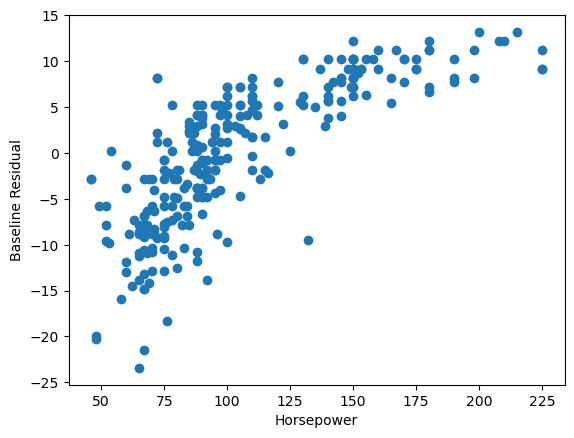

In [24]:
plt.scatter(preds['horsepower'], preds['baseline_res'])
plt.xlabel('Horsepower')
plt.ylabel('Baseline Residual')
plt.show()

In [25]:
preds['yhat_res'] = preds['yhat'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res
216,68.0,31.5,23.17,28.887523,-8.33,-2.612477
348,62.0,37.7,23.17,29.815976,-14.53,-7.884024
232,149.0,16.0,23.17,16.353407,7.17,0.353407
201,110.0,18.5,23.17,22.388352,4.67,3.888352
102,46.0,26.0,23.17,32.291851,-2.83,6.291851


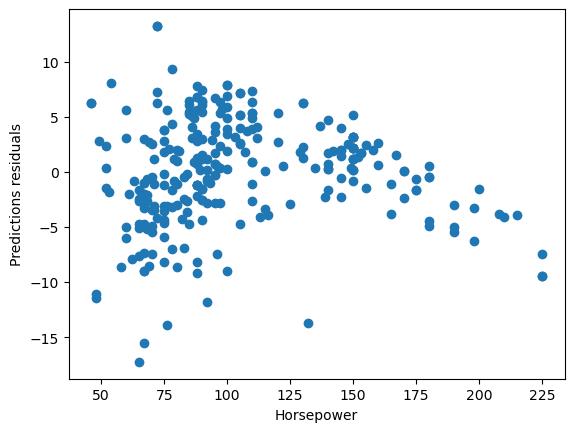

In [26]:
plt.scatter(preds['horsepower'], preds['yhat_res'])
plt.xlabel('Horsepower')
plt.ylabel('Predictions residuals')
plt.show()

compute sse 
sum of suared errors


In [27]:
preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res'],
      dtype='object')

In [28]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2
preds['yhat_res_squared'] = preds['yhat_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
216,68.0,31.5,23.17,28.887523,-8.33,-2.612477,69.3889,6.825036
348,62.0,37.7,23.17,29.815976,-14.53,-7.884024,211.1209,62.157835
232,149.0,16.0,23.17,16.353407,7.17,0.353407,51.4089,0.124897
201,110.0,18.5,23.17,22.388352,4.67,3.888352,21.8089,15.119279
102,46.0,26.0,23.17,32.291851,-2.83,6.291851,8.0089,39.587385


In [29]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_squared'].sum()
sse_baseline, sse_yhat

(16236.5786, 6271.313890186161)

compute mse

In [30]:
mse_baseline = sse_baseline / len(preds)
mse_yhat = sse_yhat / len(preds)
mse_baseline, mse_yhat

(59.257586131386866, 22.88800689848964)

rmse - root mean squared

In [35]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)
rmse_baseline, rmse_yhat

(7.697894915584836, 4.784141187140032)

with sklearn


In [36]:
sqrt(mean_squared_error(preds['mpg'], preds['baseline_preds']))

7.697894915584836